**dfset link: **https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults

# Packages:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# df Cleaning:


In [ ]:
df= pd.read_csv('autism_screening.csv',index_col=0)
df.head(5)

,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
A1_Score,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df['contry_of_res'].value_counts()

,count
contry_of_res,
United States,113
United Arab Emirates,82
New Zealand,81
India,81
United Kingdom,77
...,...
China,1
Chile,1
Lebanon,1


In [ ]:
df.dtypes

,0
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64
age,float64


In [ ]:
df.isnull().sum()

,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0
age,2


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
A1_Score,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO


In [ ]:
avg_1 = df["age"].astype("float").mean(axis = 0)
df["age"].replace(np.nan, avg_1, inplace = True)

<ipython-input-7-9cdabd2fa59b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].replace(np.nan, avg_1, inplace = True)


In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,233
Asian,123
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13
Pasifika,12


In [ ]:
df["ethnicity"].replace(np.nan, "others", inplace = True)

<ipython-input-9-cc63da140e02>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ethnicity"].replace(np.nan, "others", inplace = True)


In [ ]:
df['relation'].value_counts()

,count
relation,
Self,522
Parent,50
Relative,28
Others,5
Health care professional,4


In [ ]:
df["relation"].replace(np.nan, "others", inplace = True)

<ipython-input-11-1033720587fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["relation"].replace(np.nan, "others", inplace = True)


In [ ]:
df.drop(columns=['age_desc'], inplace=True)

In [ ]:
df.isnull().sum()

,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0
age,0


In [ ]:
df.head(5)

,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
A1_Score,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,NO
1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,NO
1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,YES
1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,NO
1,0,0,0,0,0,0,1,0,0,40.0,f,others,no,no,Egypt,no,2.0,others,NO


In [ ]:
df.dtypes

,0
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64
age,float64


# New Section

<Axes: xlabel='Class/ASD', ylabel='count'>

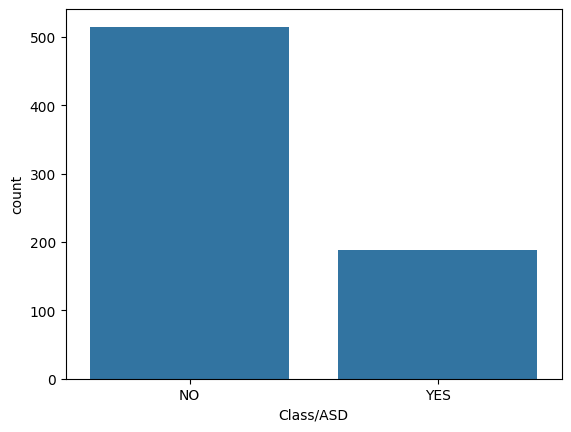

In [ ]:
sns.countplot(x = 'Class/ASD',data = df)

<ipython-input-17-fc8b6fdedc3a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color="blue")


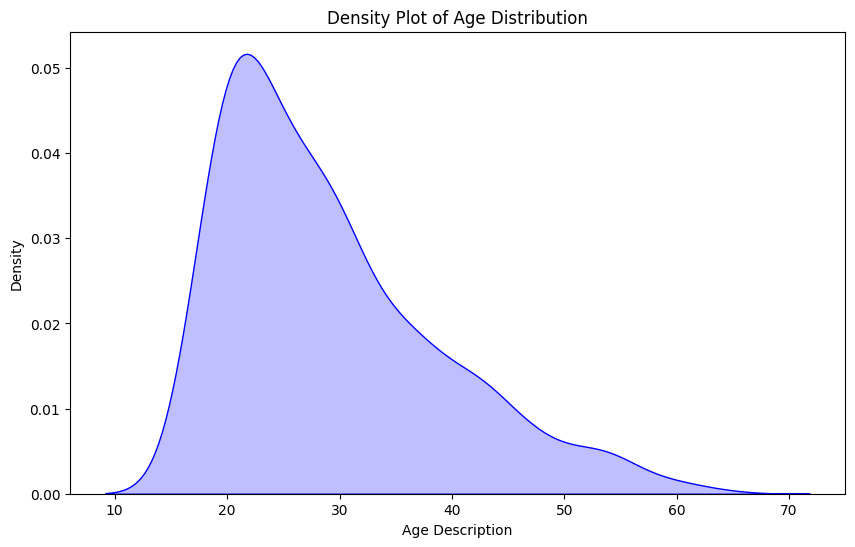

In [ ]:
df = df[(df['age'] > 0) & (df['age'] <= 120)]
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], shade=True, color="blue")
plt.title('Density Plot of Age Distribution')
plt.xlabel('Age Description')
plt.ylabel('Density')
plt.show()

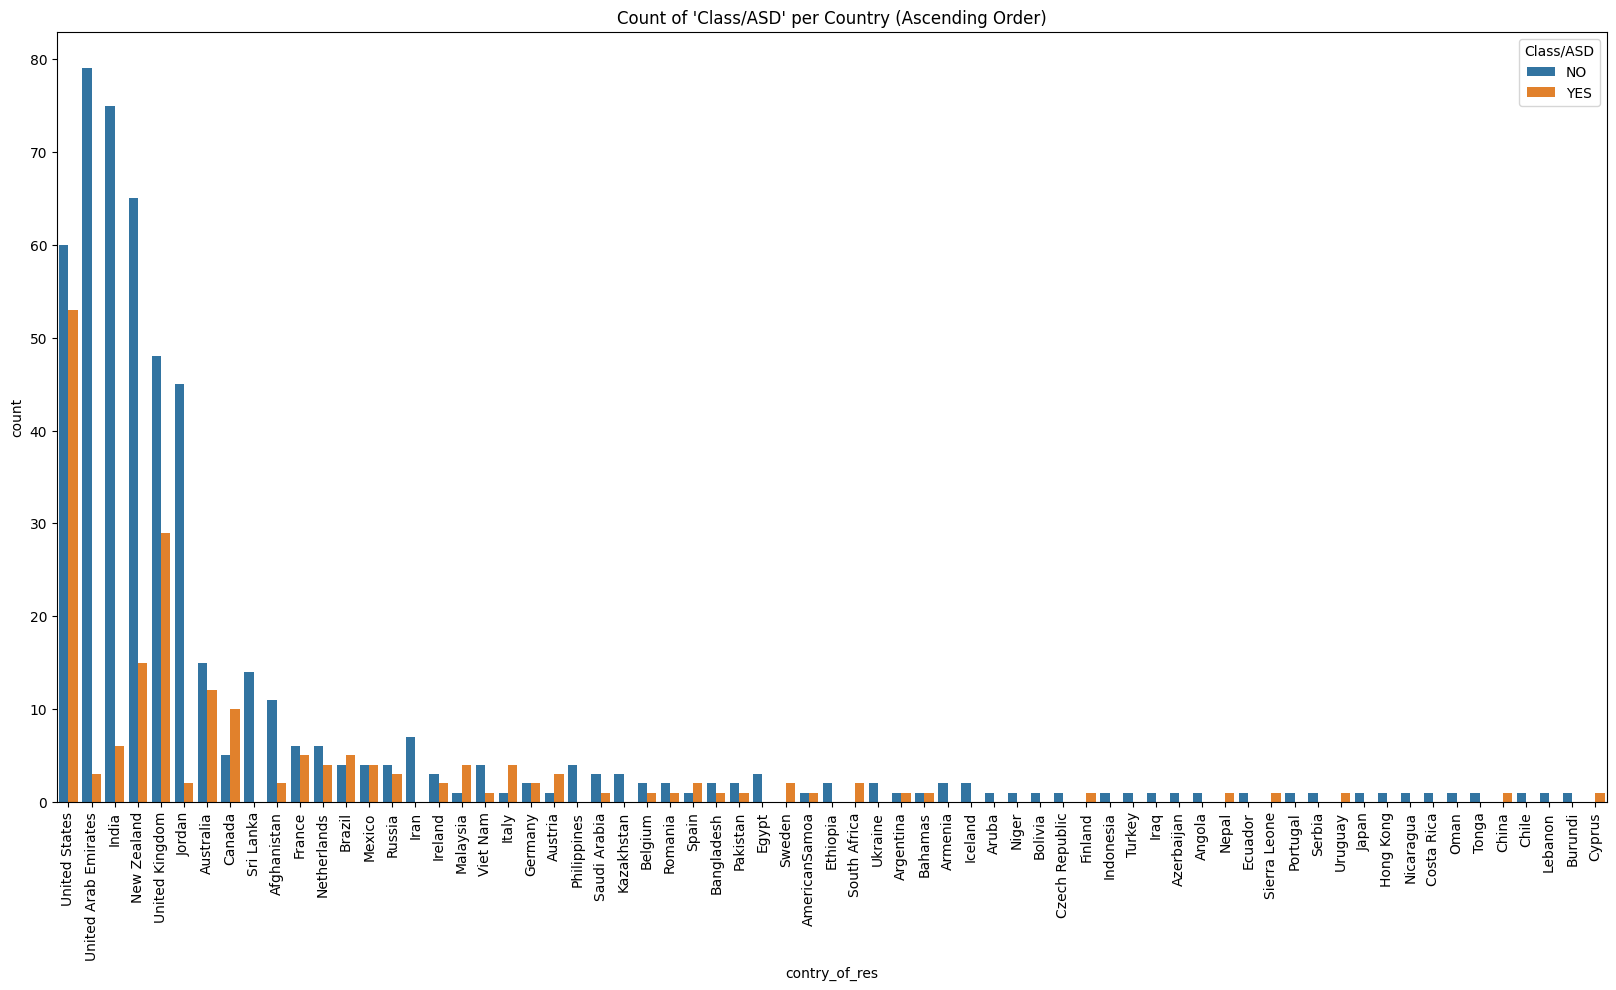

In [ ]:
country_order = df['contry_of_res'].value_counts(ascending=False).index
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD', order=country_order)
plt.xticks(rotation=90)
plt.title("Count of 'Class/ASD' per Country (Ascending Order)")
plt.show()

In [ ]:
import plotly.express as px

df_autism = df[df['Class/ASD'] == 'YES']
country_counts = df_autism['contry_of_res'].value_counts().head(15)

fig = px.bar(
    x=country_counts.values,
    y=country_counts.index,
    orientation='h',
    title='Top 15 Countries with the Most Autism Cases',
    labels={'x': 'Number of Cases', 'y': 'Country'},
    color=country_counts.values,
    color_continuous_scale='viridis'
)
fig.show()


# New Section

<ipython-input-20-1316d65470c7>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




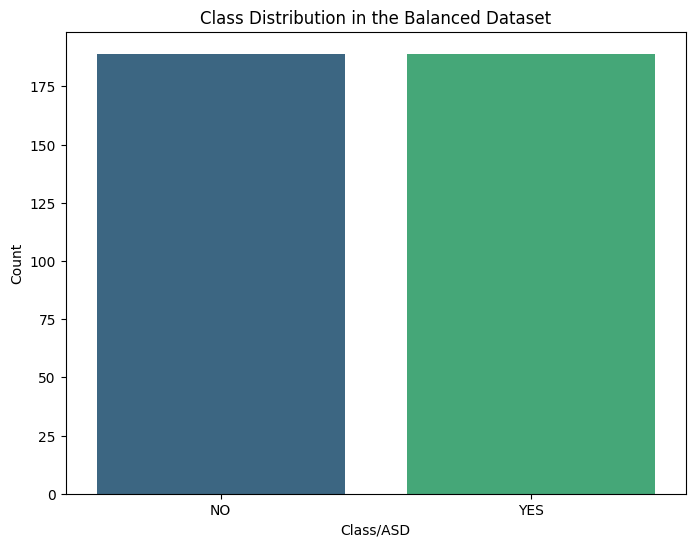

In [ ]:
# Filter minority and majority classes
data_minority = df[df['Class/ASD'] == 'YES']
data_majority = df[df['Class/ASD'] == 'NO']

# Downsample the majority class to match the minority class size
data_majority_downsampled = data_majority.sample(n=len(data_minority), random_state=42)

# Concatenate the minority and downsampled majority class
data_balanced = pd.concat([data_minority, data_majority_downsampled])

# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42)

# Split the data into features (X) and target (y)
X = data_balanced.drop('Class/ASD', axis=1)
y = data_balanced['Class/ASD']

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class/ASD', data=data_balanced, palette='viridis')
plt.title('Class Distribution in the Balanced Dataset')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()


In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res','used_app_before', 'relation', 'Class/ASD']
for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])
df = df.dropna()
df.head(5)

,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
A1_Score,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,1,1,0,0,26.0,0,2,0,0,58,0,6.0,4,0
1,1,0,1,0,0,0,1,0,1,24.0,1,5,0,1,45,0,5.0,4,0
1,1,0,1,1,0,1,1,1,1,27.0,1,5,1,1,48,0,8.0,2,1
1,1,0,1,0,0,1,1,0,1,35.0,0,2,0,1,58,0,6.0,4,0
1,0,0,0,0,0,0,1,0,0,40.0,0,3,0,0,7,0,2.0,5,0


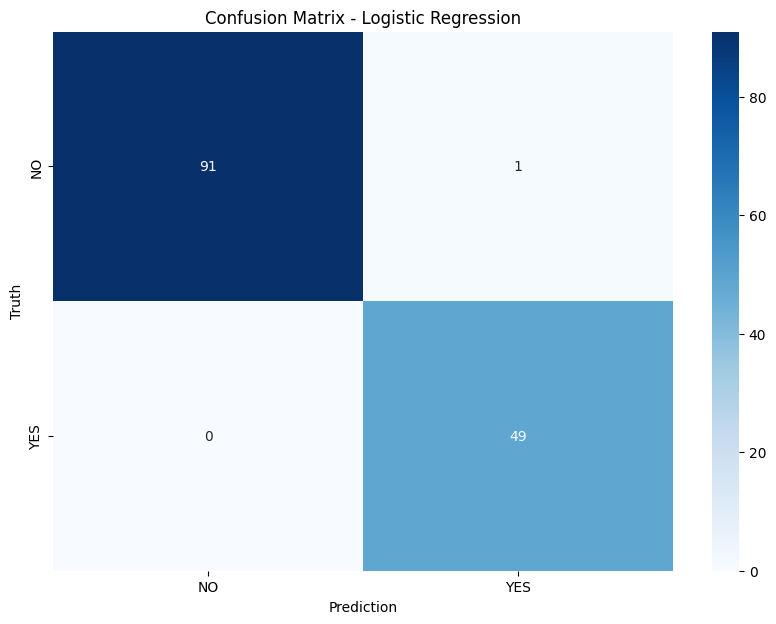

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.98      1.00      0.99        49

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

X = df.drop(columns=['Class/ASD'])  # Features
y = df['Class/ASD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter to ensure convergence
model_lr.fit(X_train, y_train)

# Make predictions
y_predict_lr = model_lr.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict_lr)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Optionally, print classification report
print(classification_report(y_test, y_predict_lr))
